#  Predicción de precios en el mercado de autos usados a partir de características

En el mercado de automóviles de segunda mano, determinar el valor exacto de un vehículo es un desafío debido a la gran cantidad de variables que influyen en su precio. Tanto compradores como vendedores enfrentan la incertidumbre de establecer un valor justo, lo que a menudo resulta en transacciones que no reflejan el verdadero valor del auto. Esto puede conducir a pérdidas significativas, ya sea por pagar de más o recibir menos de lo que el vehículo realmente vale. Tradicionalmente, el precio se ha calculado en función de la intuición o el conocimiento personal sobre autos, métodos que, aunque útiles, carecen de precisión y pueden fallar.
Para mejorar la precisión en la valoración de automóviles usados, hemos desarrollado un sistema basado en técnicas avanzadas de data science y machine learning. Este sistema organiza y analiza una base de datos exhaustiva de vehículos, permitiendo realizar comparaciones detalladas entre diferentes opciones. Al emplear modelos de machine learning, podemos identificar patrones complejos y hacer predicciones precisas, tomando en cuenta una variedad de factores críticos que influyen en el precio del auto. Estos factores incluyen el tiempo de uso, el estado de las distintas piezas, el historial de mantenimiento, la demanda del modelo en el mercado, y las fluctuaciones en los precios a lo largo del tiempo.
Gracias a este enfoque, logramos una predicción de precios significativamente más precisa, superando las estimaciones basadas únicamente en la intuición. Este sistema no solo aporta mayor confianza a compradores y vendedores, sino que también optimiza el proceso de compra-venta, ahorrando tiempo y minimizando riesgos financieros.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime

In [2]:
df = pd.read_csv("Mazda ChileAutos.csv", delimiter=";")
df

,id,enlace,titulo,marca,modelo,motor,combustible,kilometraje,transmision,precio,localidad,region
0,CL-AD-14735282,https://www.chileautos.cl/vehiculos/detalles/2...,2013 Mazda 6 2.0 Skyactiv-G LE Auto,MAZDA,MAZDA6,20.0,Bencina,103900,Automatica,10000000.0,Puente Alto,NaN
1,CL-AD-15499247,https://www.chileautos.cl/vehiculos/detalles/2...,2020 Mazda Bt-50 3.2 DSL SDX Auto Hi Rider 4WD,MAZDA,BT-50,32.0,Diesel,92000,Automatica,20900000.0,Vitacura,NaN
2,CL-AD-15185232,https://www.chileautos.cl/vehiculos/detalles/2...,2019 Mazda Bt-50 2.2 DSL Manual SDX 4WD,MAZDA,BT-50,22.0,Diesel,94000,Manual,21700000.0,Galvarino,Araucania
3,CL-AD-15158840,https://www.chileautos.cl/vehiculos/detalles/2...,2020 Mazda 3 Sport,NaN,NaN,NaN,Bencina,25000,Automatica,19800000.0,Vina del Mar,Valparaiso
4,CP-AD-8267126,https://www.chileautos.cl/vehiculos/detalles/2...,2013 Mazda 2 1.5 V,MAZDA,MAZDA2,15.0,Bencina,61450,Manual,7390000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1007,CL-AD-15796914,https://www.chileautos.cl/vehiculos/detalles/2...,2015 Mazda 3 Sport,NaN,NaN,NaN,Bencina,146000,Manual,10500000,Concon,Valparaiso
1008,CL-AD-15771595,https://www.chileautos.cl/vehiculos/detalles/2...,2016 Mazda 3 2.0 Auto Skyactiv-G V SR,MAZDA,MAZDA3,20.0,Bencina,60000,Automatica,11200000,Colina,NaN
1009,CL-AD-15630628,https://www.chileautos.cl/vehiculos/detalles/2...,2020 Mazda Cx-5 2.0 Manual Skyactiv R,MAZDA,CX-5,20.0,Bencina,71000,Manual,17290000,Puerto Varas,Los Lagos
1010,CL-AD-15673442,https://www.chileautos.cl/vehiculos/detalles/2...,2021 Mazda Cx-5 2.0 Skyactiv R Auto,MAZDA,CX-5,20.0,Bencina,27500,Automatica,19750000,Santiago,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1012 non-null   object 
 1   enlace       1012 non-null   object 
 2   titulo       1012 non-null   object 
 3   marca        708 non-null    object 
 4   modelo       707 non-null    object 
 5   motor        707 non-null    float64
 6   combustible  1011 non-null   object 
 7   kilometraje  1012 non-null   object 
 8   transmision  1012 non-null   object 
 9   precio       1012 non-null   object 
 10  localidad    928 non-null    object 
 11  region       300 non-null    object 
dtypes: float64(1), object(11)
memory usage: 95.0+ KB


In [4]:
df.drop(columns="id", inplace=True)

In [5]:
display(df.iloc[142,:])
df.drop(index=142, inplace=True)

enlace         https://www.chileautos.cl/vehiculos/detalles/2...
titulo         2015 Mazda Cx-5 Tapiz de cuero 4x4 Techo corre...
marca                                                        etc
modelo                                                       NaN
motor                                                        NaN
combustible                                                  NaN
kilometraje                                              Bencina
transmision                                               117000
precio                                                Automatica
localidad                                             12900000.0
region                                                Las Condes
Name: 142, dtype: object

In [6]:
df["kilometraje"] = pd.to_numeric(df.kilometraje)
df["precio"] = pd.to_numeric(df.precio) / 1_000_000
df["motor"] = df.motor / 10

## Obtener año

In [7]:
df['año'] = df['titulo'].str.extract(r'(\b\d{4}\b)')

# Convertir la columna 'año' a un tipo de dato numérico
df['año'] = pd.to_numeric(df['año'])
df

,enlace,titulo,marca,modelo,motor,combustible,kilometraje,transmision,precio,localidad,region,año
0,https://www.chileautos.cl/vehiculos/detalles/2...,2013 Mazda 6 2.0 Skyactiv-G LE Auto,MAZDA,MAZDA6,2.0,Bencina,103900,Automatica,10.00,Puente Alto,NaN,2013
1,https://www.chileautos.cl/vehiculos/detalles/2...,2020 Mazda Bt-50 3.2 DSL SDX Auto Hi Rider 4WD,MAZDA,BT-50,3.2,Diesel,92000,Automatica,20.90,Vitacura,NaN,2020
2,https://www.chileautos.cl/vehiculos/detalles/2...,2019 Mazda Bt-50 2.2 DSL Manual SDX 4WD,MAZDA,BT-50,2.2,Diesel,94000,Manual,21.70,Galvarino,Araucania,2019
3,https://www.chileautos.cl/vehiculos/detalles/2...,2020 Mazda 3 Sport,NaN,NaN,NaN,Bencina,25000,Automatica,19.80,Vina del Mar,Valparaiso,2020
4,https://www.chileautos.cl/vehiculos/detalles/2...,2013 Mazda 2 1.5 V,MAZDA,MAZDA2,1.5,Bencina,61450,Manual,7.39,NaN,NaN,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
1007,https://www.chileautos.cl/vehiculos/detalles/2...,2015 Mazda 3 Sport,NaN,NaN,NaN,Bencina,146000,Manual,10.50,Concon,Valparaiso,2015
1008,https://www.chileautos.cl/vehiculos/detalles/2...,2016 Mazda 3 2.0 Auto Skyactiv-G V SR,MAZDA,MAZDA3,2.0,Bencina,60000,Automatica,11.20,Colina,NaN,2016
1009,https://www.chileautos.cl/vehiculos/detalles/2...,2020 Mazda Cx-5 2.0 Manual Skyactiv R,MAZDA,CX-5,2.0,Bencina,71000,Manual,17.29,Puerto Varas,Los Lagos,2020
1010,https://www.chileautos.cl/vehiculos/detalles/2...,2021 Mazda Cx-5 2.0 Skyactiv R Auto,MAZDA,CX-5,2.0,Bencina,27500,Automatica,19.75,Santiago,NaN,2021


In [8]:
df_eda = df.iloc[:,2:]
df_eda

,marca,modelo,motor,combustible,kilometraje,transmision,precio,localidad,region,año
0,MAZDA,MAZDA6,2.0,Bencina,103900,Automatica,10.00,Puente Alto,NaN,2013
1,MAZDA,BT-50,3.2,Diesel,92000,Automatica,20.90,Vitacura,NaN,2020
2,MAZDA,BT-50,2.2,Diesel,94000,Manual,21.70,Galvarino,Araucania,2019
3,NaN,NaN,NaN,Bencina,25000,Automatica,19.80,Vina del Mar,Valparaiso,2020
4,MAZDA,MAZDA2,1.5,Bencina,61450,Manual,7.39,NaN,NaN,2013
...,...,...,...,...,...,...,...,...,...,...
1007,NaN,NaN,NaN,Bencina,146000,Manual,10.50,Concon,Valparaiso,2015
1008,MAZDA,MAZDA3,2.0,Bencina,60000,Automatica,11.20,Colina,NaN,2016
1009,MAZDA,CX-5,2.0,Bencina,71000,Manual,17.29,Puerto Varas,Los Lagos,2020
1010,MAZDA,CX-5,2.0,Bencina,27500,Automatica,19.75,Santiago,NaN,2021


### Precio

C:\Users\Timining\anaconda3\envs\maci\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


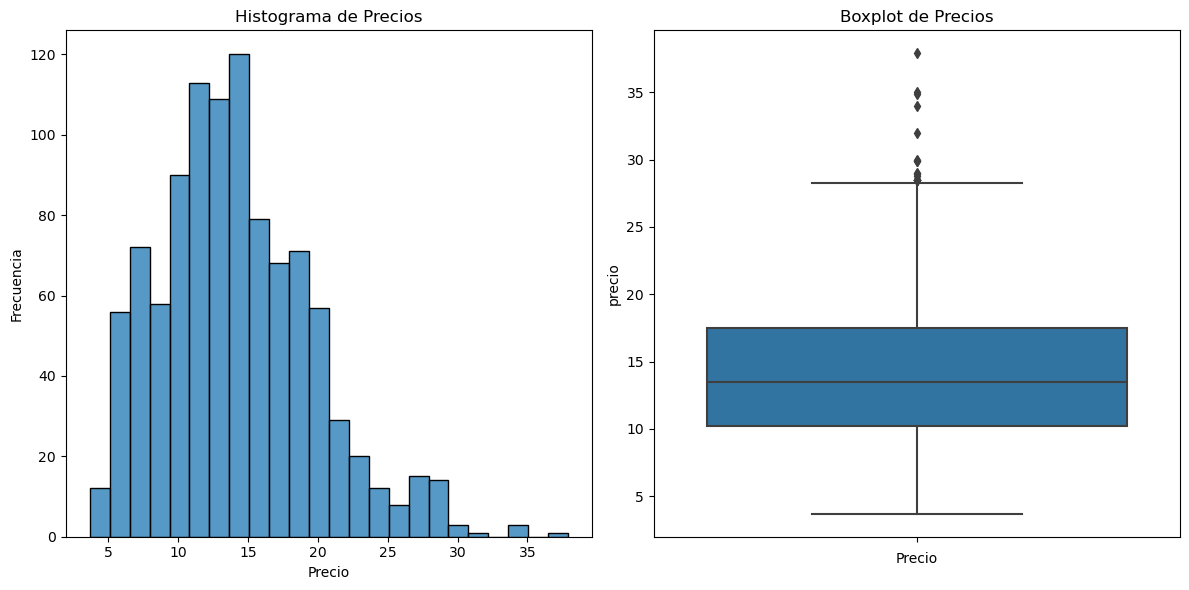

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histograma a la izquierda
sns.histplot(df_eda['precio'], kde=False, ax=axes[0])
axes[0].set_title('Histograma de Precios')
axes[0].set_xlabel('Precio')
axes[0].set_ylabel('Frecuencia')

# Diagrama de caja (boxplot) a la derecha
sns.boxplot(y=df_eda['precio'], ax=axes[1])
axes[1].set_title('Boxplot de Precios')
axes[1].set_xlabel('Precio')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


### Relación entre kilometraje y precio

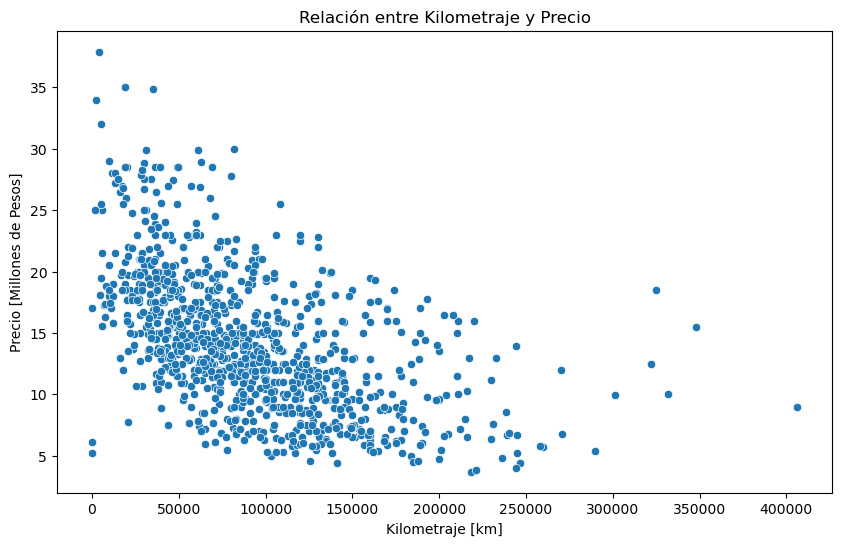

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='kilometraje', y='precio', data=df_eda[df_eda.kilometraje < 700000])
plt.title('Relación entre Kilometraje y Precio')
plt.xlabel('Kilometraje [km]')
plt.ylabel('Precio [Millones de Pesos]')
plt.show()


### Relación entre tipo de combustible y precio

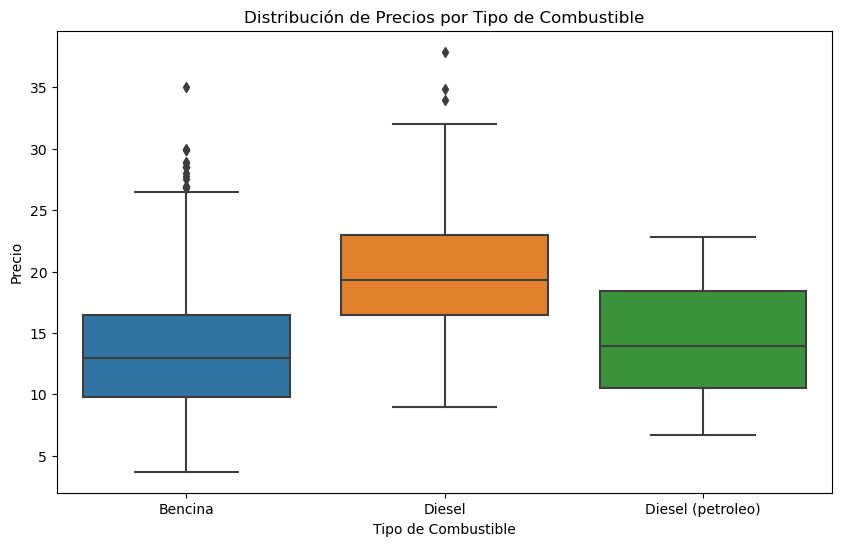

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='combustible', y='precio', data=df)
plt.title('Distribución de Precios por Tipo de Combustible')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Precio')
plt.show()


Hay 2 valore que hacen referencia a combustible Diesel.

In [12]:
df['combustible'] = df.combustible.replace('Diesel (petroleo)', 'Diesel')
df_eda["combustible"] = df.combustible

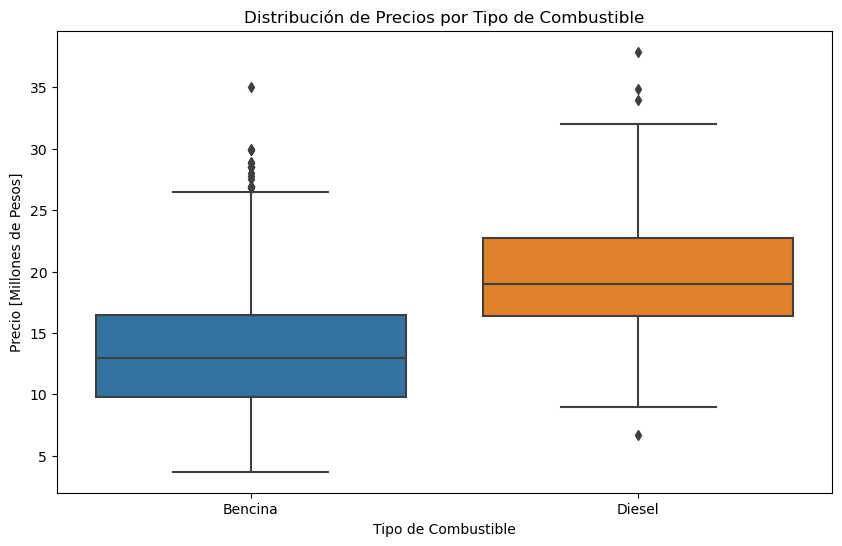

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='combustible', y='precio', data=df_eda)
plt.title('Distribución de Precios por Tipo de Combustible')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Precio [Millones de Pesos]')
plt.show()

### Relación entre tipo de transmición y precio

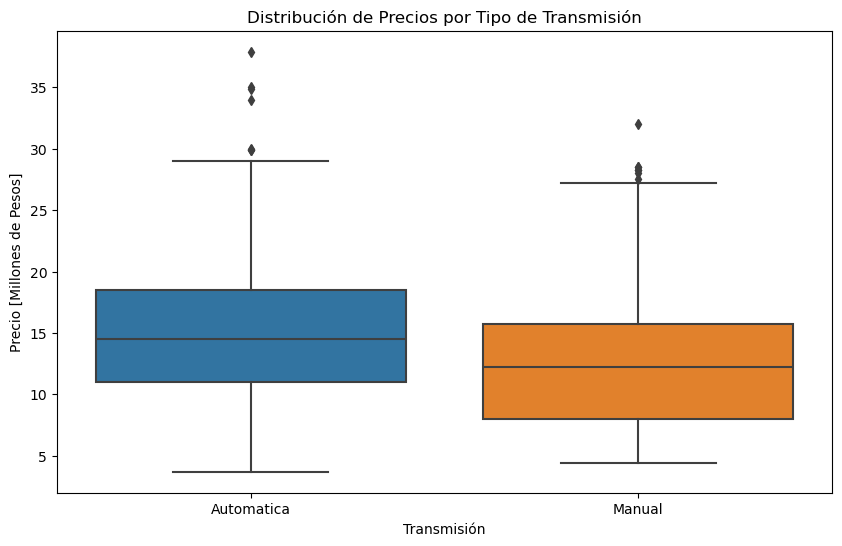

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmision', y='precio', data=df)
plt.title('Distribución de Precios por Tipo de Transmisión')
plt.xlabel('Transmisión')
plt.ylabel('Precio [Millones de Pesos]')
plt.show()


### Relación entre Año y precio

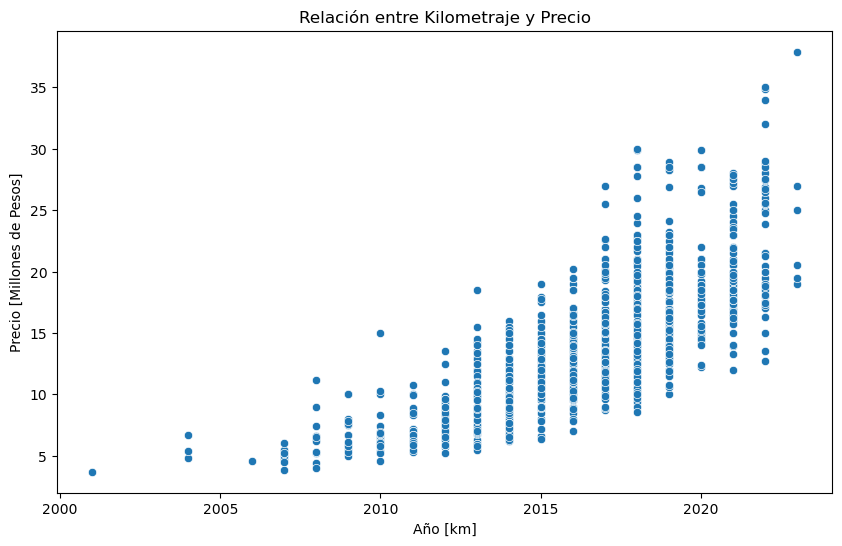

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='año', y='precio', data=df_eda[df_eda.año > 2000])
plt.title('Relación entre Kilometraje y Precio')
plt.xlabel('Año [km]')
plt.ylabel('Precio [Millones de Pesos]')
plt.show()

### Relación entre kilometraje y precio

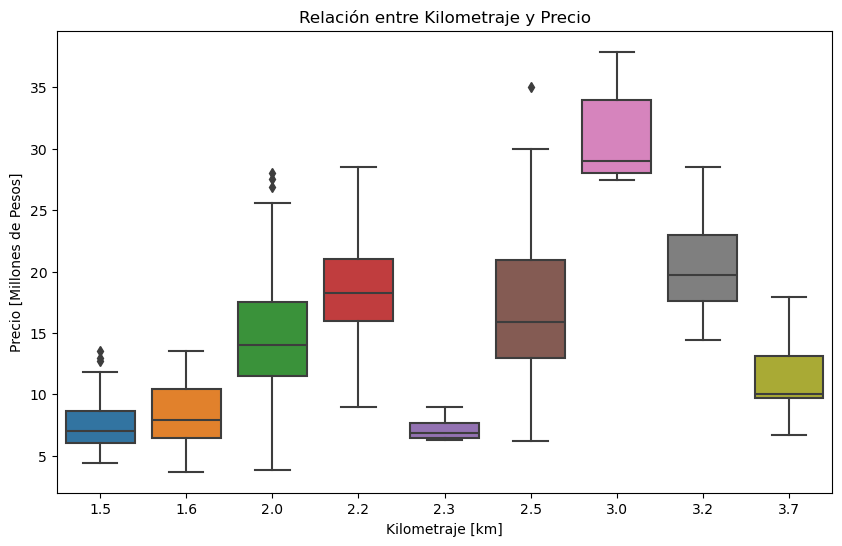

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='motor', y='precio', data=df[df.kilometraje < 700000])
plt.title('Relación entre Kilometraje y Precio')
plt.xlabel('Kilometraje [km]')
plt.ylabel('Precio [Millones de Pesos]')
plt.show()

C:\Users\Timining\anaconda3\envs\maci\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Timining\anaconda3\envs\maci\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Timining\anaconda3\envs\maci\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


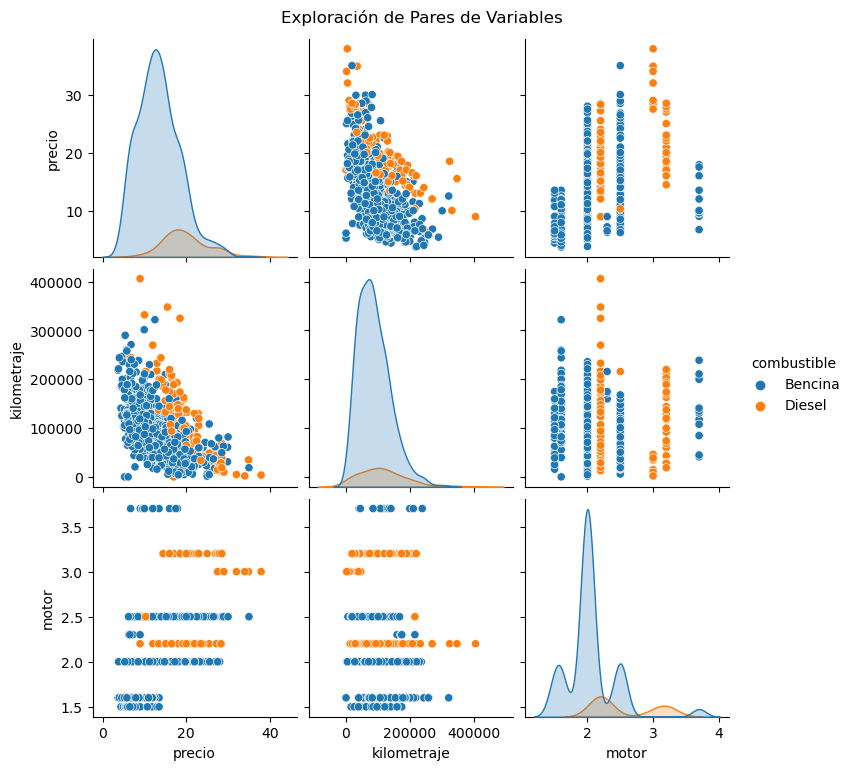

In [17]:
sns.pairplot(df_eda[df_eda.kilometraje < 700000], vars=['precio', 'kilometraje', 'motor'], hue='combustible')
plt.suptitle('Exploración de Pares de Variables', y=1.02)
plt.show()


### Kilometraje por año

In [18]:
# Obtener el año actual
year_current = datetime.now().year

# Crear la columna de cantidad de años del auto
df_eda['años_auto'] = year_current - df_eda['año']

# Crear la columna de kilometraje por año
df_eda['kilometraje_por_año'] = df_eda['kilometraje'] / df_eda['años_auto']

df_eda

,marca,modelo,motor,combustible,kilometraje,transmision,precio,localidad,region,año,años_auto,kilometraje_por_año
0,MAZDA,MAZDA6,2.0,Bencina,103900,Automatica,10.00,Puente Alto,NaN,2013,11,9445.454545
1,MAZDA,BT-50,3.2,Diesel,92000,Automatica,20.90,Vitacura,NaN,2020,4,23000.000000
2,MAZDA,BT-50,2.2,Diesel,94000,Manual,21.70,Galvarino,Araucania,2019,5,18800.000000
3,NaN,NaN,NaN,Bencina,25000,Automatica,19.80,Vina del Mar,Valparaiso,2020,4,6250.000000
4,MAZDA,MAZDA2,1.5,Bencina,61450,Manual,7.39,NaN,NaN,2013,11,5586.363636
...,...,...,...,...,...,...,...,...,...,...,...,...
1007,NaN,NaN,NaN,Bencina,146000,Manual,10.50,Concon,Valparaiso,2015,9,16222.222222
1008,MAZDA,MAZDA3,2.0,Bencina,60000,Automatica,11.20,Colina,NaN,2016,8,7500.000000
1009,MAZDA,CX-5,2.0,Bencina,71000,Manual,17.29,Puerto Varas,Los Lagos,2020,4,17750.000000
1010,MAZDA,CX-5,2.0,Bencina,27500,Automatica,19.75,Santiago,NaN,2021,3,9166.666667


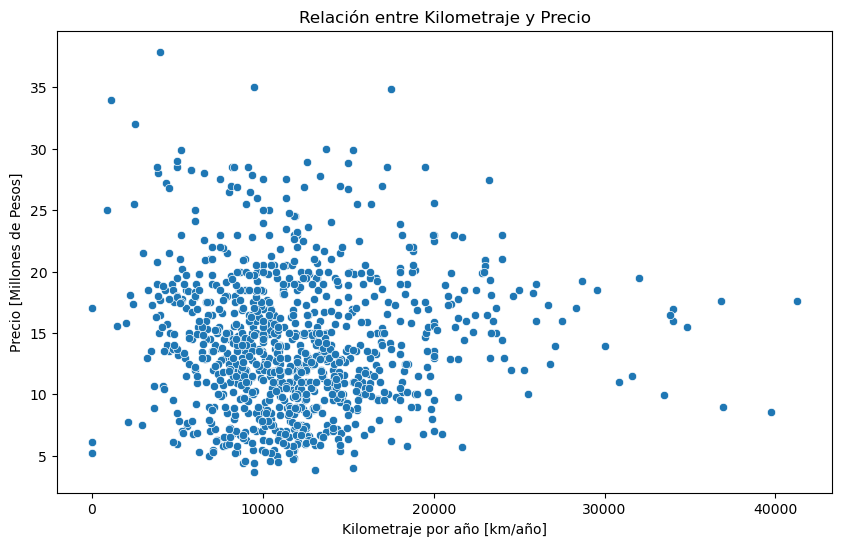

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='kilometraje_por_año', y='precio', data=df_eda[df_eda.kilometraje_por_año < 80_000])
plt.title('Relación entre Kilometraje y Precio')
plt.xlabel('Kilometraje por año [km/año]')
plt.ylabel('Precio [Millones de Pesos]')
plt.show()

### Matriz de correlación

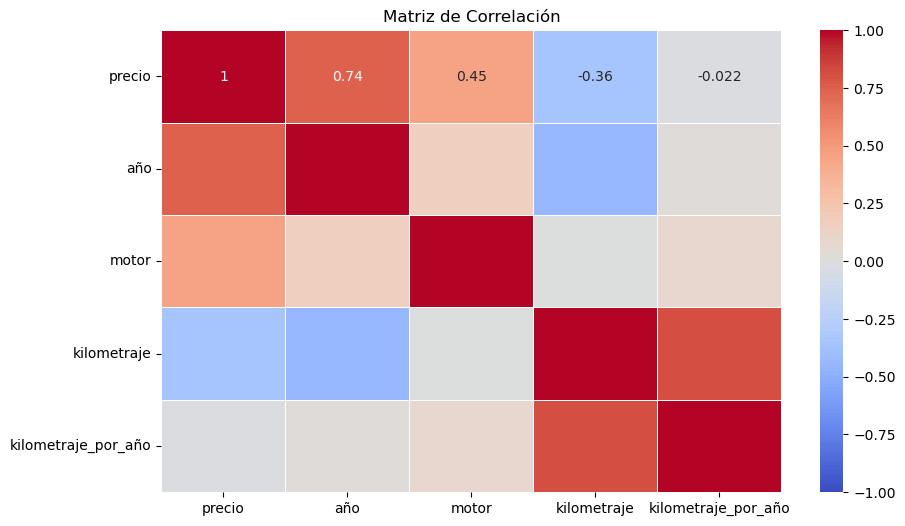

In [20]:
plt.figure(figsize=(10, 6))
correlation_matrix = df_eda[["precio", "año", "motor", "kilometraje", "kilometraje_por_año"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1)
plt.title('Matriz de Correlación')
plt.show()
